
# SAMSUNG Mobile Price Prediction Model

Model Objective:-

The model aims to predict the price for Samsung mobile phones that belong to range 0,1,2, & 3. The procedure has been performed using supervised learning algorithm.

Database Desciption:-

Price Range: 0,1,2 & 3 

Data source: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

Alogorithms Applied: 

    1) K Nearest Neighbor (KNN) Algorithm
    
    2) Random Forest Regressor Algorithm
    
Important Libraries:

    1) Pandas
    
    2) Seaborn
    
    3) Matplot library
    
    4) Numpy
    
    5) Sk learn
    

    

# Loading the library:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\kanis\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the Dataset:

In [2]:
MOB = pd.read_csv('Mobile_Price.csv')
MOB

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
MOB.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
MOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# K-Nearest Neighbor Algorithm:

# Data standardisation:-

In [33]:
# Using standard scaler method.
from sklearn.preprocessing import StandardScaler

In [6]:
Scaler = StandardScaler()

In [7]:
Scaler.fit(MOB.drop('price_range',axis=1))

StandardScaler()

In [8]:
Scaled_Data = Scaler .transform(MOB.drop('price_range',axis=1))

In [9]:
Scaled_Data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [10]:
Scaled_Data = pd.DataFrame(Scaled_Data,columns=MOB.columns[:-1])
Scaled_Data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [11]:
Scaled_Data.head()    # Scaled Dataset of the independent variables.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


# Training and testing of dataset:-

In [12]:
# Training and testing of dataset:-
from sklearn.model_selection import train_test_split

In [79]:
X = Scaled_Data # Independent variables
y = MOB['price_range']   # Dependent Variable

In [14]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


In [15]:
y # Price range spans from 0,1,2 and 3.

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [16]:
# Training and testing databases.
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 101)

In [17]:
# We will be classifying the dataset into clases based on K values. For this purpose, we will be importing KNeighbourclassifier.
from sklearn.neighbors import KNeighborsClassifier


In [18]:
knn = KNeighborsClassifier(n_neighbors =1) # The number of neighbors that we require for modeling. 

In [19]:
knn.fit(X_train,y_train)  # Training of dataset.

KNeighborsClassifier(n_neighbors=1)

In [20]:
Pred = knn.predict(X_test)
Pred                                   # Prediction of testing dataset.

array([1, 1, 2, 3, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       1, 2, 3, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 3, 0, 1, 2,
       3, 0, 2, 2, 3, 0, 0, 0, 1, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 2, 0, 0, 1, 2, 3, 3, 0, 0,
       0, 1, 3, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 3, 1, 1, 3, 1, 3, 2, 2, 1, 1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 3, 2, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1, 3, 1, 2, 0, 2, 1,
       3, 2, 3, 0, 3, 1, 2, 3, 0, 2, 2, 1, 0, 0, 3, 3, 0, 3, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 0, 1, 1, 1, 3, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 3,
       2, 0, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3, 0, 2, 2, 3,
       2, 2, 2, 0, 1, 3, 1, 0, 3, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1,
       2, 0, 0, 1, 3, 1, 3, 2, 3, 1, 1, 1, 3, 2, 1, 2, 0, 2, 1, 3, 3, 0,
       0, 0, 3, 2, 0, 2, 1, 1, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 1, 0, 1,
       3, 2, 2, 3, 3, 3, 0, 2, 1, 2, 3, 2, 0, 1, 2,

In [21]:
# Evalutating the KNN Model based on classification matrix.
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       144
           1       0.24      0.33      0.28       141
           2       0.35      0.29      0.32       178
           3       0.55      0.50      0.52       137

    accuracy                           0.41       600
   macro avg       0.42      0.41      0.42       600
weighted avg       0.42      0.41      0.41       600



# Model Evaluation:- 

In [81]:
# Checking for k values and their error rates:-
error_rate = []

# kvalues spanning from 1 to 250.
for i in range(1,100):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # The error list will consist of details related to an error when the predicted value is not equal to y test values.

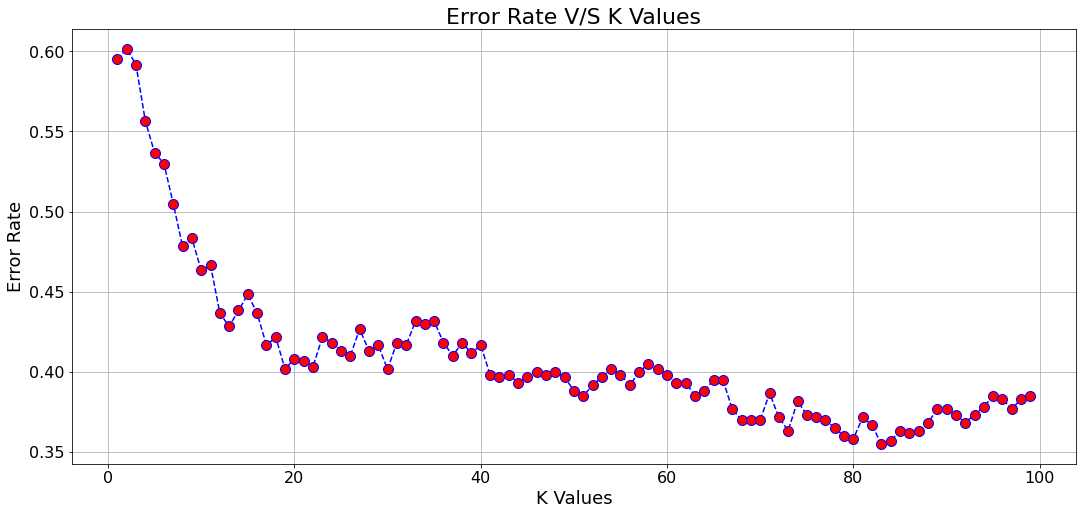

In [85]:
# Plotting of K values and Error rates.
plt.figure(figsize=(18,8))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid()
plt.title('Error Rate V/S K Values',fontsize=22)
plt.xlabel('K Values',fontsize=18)
plt.ylabel('Error Rate',fontsize=18)
plt.show()

In [86]:
#Trying K = 80
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,y_train)
Pred = knn.predict(X_test)
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75       144
           1       0.44      0.60      0.51       141
           2       0.72      0.41      0.52       178
           3       0.78      0.83      0.81       137

    accuracy                           0.64       600
   macro avg       0.66      0.66      0.64       600
weighted avg       0.66      0.64      0.64       600



In [87]:
# There has been an increase in the accuracy of the model by 25%. 
knn.score(X_test,y_test)

0.6416666666666667

# Random Forest Regressor:

In [34]:
# Appilcation of random forest regressor.
from sklearn.ensemble import RandomForestClassifier  

In [35]:
# Taking estimators as 100.
RFC = RandomForestClassifier(n_estimators = 100)

In [36]:
# Training the model.
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
# Predicting the mobile price range.
RFC_pred = RFC.predict(X_test)

In [39]:
print(RFC_pred)

[1 1 2 1 0 1 2 1 1 0 0 1 1 1 1 0 1 1 0 0 3 1 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 3 2 3 1 2 3 3 1 0 1 2 3 3 2 0 3 2 3 2 2 3 1 3 1 0 0 0 2 1 1 3 2
 2 3 3 2 0 2 0 0 2 1 2 2 2 1 0 0 3 3 0 2 0 3 2 0 1 3 0 2 2 3 0 3 0 0 2 0 1
 0 3 2 2 1 1 2 1 0 3 3 2 3 1 2 3 2 1 1 0 0 0 1 0 2 3 0 2 2 1 3 0 1 0 1 0 2
 3 0 3 1 2 2 3 2 2 0 3 2 2 2 2 2 1 2 1 1 3 3 1 3 0 3 1 3 2 2 3 2 2 1 0 1 3
 3 1 2 0 3 1 0 2 3 0 2 0 0 3 0 0 1 3 2 1 3 0 3 2 2 1 1 1 3 0 3 0 0 3 1 1 2
 3 0 1 3 3 0 3 1 1 2 0 3 1 3 1 2 2 0 1 2 2 3 0 3 3 2 3 3 1 3 1 1 3 2 0 2 0
 1 1 3 3 0 1 0 2 1 0 2 3 1 3 2 1 2 1 2 1 3 1 3 0 2 2 2 2 1 2 3 2 3 0 1 1 0
 3 1 0 1 3 3 1 2 3 3 1 1 1 1 2 0 0 0 1 1 3 1 2 2 1 3 1 3 0 2 2 0 0 2 2 2 2
 1 0 0 2 2 1 1 2 2 3 0 0 1 0 2 3 3 2 2 2 1 0 3 2 0 0 2 1 3 2 1 0 1 0 2 0 0
 1 0 0 1 1 2 1 3 2 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 1 3 2 0 3 3 2 0 3 2 2 1
 3 0 2 1 2 1 2 2 0 2 0 0 3 1 1 2 1 1 1 3 0 3 1 3 2 3 2 3 3 3 1 1 3 0 0 3 2
 0 0 1 2 1 3 0 3 0 2 0 0 2 2 3 1 0 1 3 2 0 3 2 3 2 3 0 2 2 2 1 2 3 3 1 3 1
 2 0 2 2 1 3 2 1 1 3 3 0 

# Model Evaluation:-

In [88]:

print(classification_report(y_test,RFC_pred))
print('\n')
print(RFC.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       144
           1       0.80      0.84      0.82       141
           2       0.88      0.78      0.82       178
           3       0.86      0.93      0.89       137

    accuracy                           0.86       600
   macro avg       0.86      0.87      0.87       600
weighted avg       0.87      0.86      0.86       600



0.865


Insight:

- The model score is 0.865

- There has been an increase in accuracy by 25%.


# Data Visualisation:-

C:\Users\kanis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kanis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


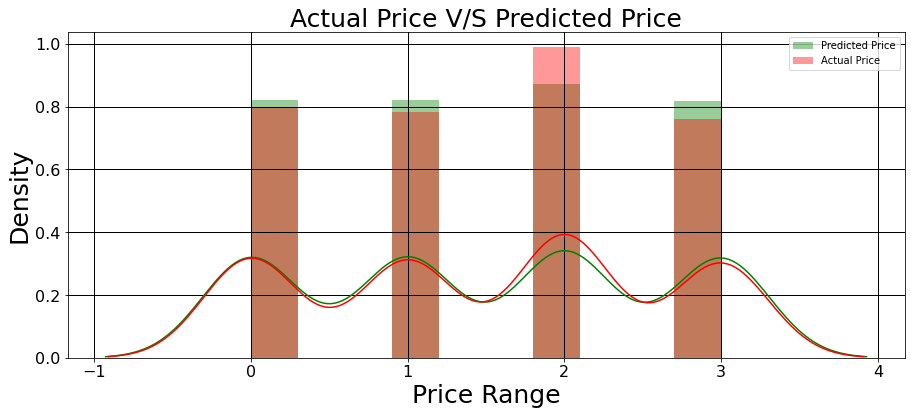

In [89]:
# Distribution Plot:-
plt.figure(figsize=(15,6))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
sns.distplot(RFC_pred,bins=10,label ='Predicted Price',color='g',hist_kws=dict(linewidth=50))  #Predicted price
sns.distplot(y_test,bins =10, label = 'Actual Price',color='r',hist_kws=dict(linewidth=50))    # Actual price
plt.xlabel('Price Range',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.grid(color='Black',linestyle='-',linewidth=1)
plt.title('Actual Price V/S Predicted Price',fontsize=25)
plt.legend()
plt.show()

# Conclusion:

- The price for the mobile phone belonging to the price range of 0,1 and 3 is expected to be increased.
- The price for the mobile phone belonging to the price range of 2 is expected to be decreased.
- Therefore, the model is ready to be deployed for prediction procedure with the capability of 86% accuracy.